# <center>Dictionary learning for classification problems</center>
### <center> Industrial mathmatics project, TMA4320 Introduction to scientific calculations </center>
#### <center> Duedate project: Monday Februay March 6th 2023 </center>
#### <center> Group members: Eva Weiss, Paul Marino, Anja Ringstad </center>

<b> Introduction

In this project we will make use of dictionary learning, and try to categorize the MNIST dataset. The MNIST dataset is a set of standardised pictures of drawn numbers, and is often used to test the accuracy and efficiency of a machine learning algorithm. Dictionary learning, as a subfield of machine learning, involves training programs to learn from and make predictions on data. It is a method which involves extracting a set of linear basis vectors from a dataset, and then using those basis vectors to represent the data more efficiently. One can then test how well a new datapoint can be described by a set of basis vectors. This can be used to classify that new datapoint.  In this project we will make general code to create the basis vectors before creating specific bases for the MNIST dataset. Then tests will be performed to evaluate the implementation of the dictionary learning method.

## <center>  Task 1

<b> 1a

Singular Value Decomposition (SVD) is a generalization of matrix diagonalization and a factorization technique. The goal of
the SVD is «decomposing the original matrix in terms of its singular values (Menke, 2012, s.127).» This is done by 
decomposing any mxn matrix A into the product of three matrices:

$$A = U\Sigma V^T \tag{1}$$

Where $U$ and $V^T$ are orthogonal matrices and $\Sigma$ is diagonal and contains the singular values, or in this case eigenvalues, ordered from largest to 
smallest. In dictionary learning we want to decompose A into a small amount of basis vectors. Eq (1) can be written as 

$$A=WH \tag{2}$$

where the dictionay with basisvectors $W=U$ and $H=\Sigma V^T$ (Ludvigsen, 2023).

The first task is to calculate the SVD compositions for matrix A1 using np.linalg.svd().  We can check if the function works by multiplying the matrices $U$, $\Sigma$ and $V^T$ and seeing if this equals the original matrix $A$. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create matrices
A1 = np.array([[1000,1],[0,1],[0,0]])
A2 = np.array([[1,0,0],[1,0,0],[0,0,1]])

b1 = np.array([2, 1, 0])   
b2 = np.array([0, 0, 1])
b3 = np.array([0, 1, 0])

B =np.array([b1, b2, b3]).transpose()



# Calculate SVD
U,S,Vt = np.linalg.svd(A1, full_matrices = False)


print("Shape of S: ", S.shape)  # Expect (2,)
print("\nU: \n", U)
print("\nS: \n", S)
print("\nVt: \n", Vt)

# Check if SVD = A
m = S.shape[0]

prod1 = (U[:,:m]*S)@Vt          # Slicing U and using the hadamard product to avoid using S as a 2x2 matrix
print(f"USVT = \n{prod1}")

# Use np.allclose() to check if A and USVt are the same, while ignoring small rounding errors:
print(f"A1 and USVt equal?: {np.allclose(A1, prod1)}") 

Shape of S:  (2,)

U: 
 [[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]]

S: 
 [1.0000005e+03 9.9999950e-01]

Vt: 
 [[ 0.9999995  0.001    ]
 [-0.001      0.9999995]]
USVT = 
[[ 1.00000000e+03  1.00000000e+00]
 [-2.18499053e-19  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]
A1 and USVt equal?: True


As we see from the output above, A1 and USVt are equal, or at least only differ by an extremely small amount caused by floating point errors. The floating point errors made it hard to compare the matrices A1 and USVt just by printing them, so the function np.allclose() was used to confirm if the matrices where the same.  Because the vector S only contains the diagonal elements without the zeros, the product USVt is not possible only using matrix multiplication because of S' dimensions. To avoid making S into a diagonal matrix, we used slicing and the dot product, which gets us to the same result. As the elements in S are sorted from largest to smallest, the first basis vector in U would be the most important for reconstructing A1. This means the weight of the first column would be greater than that of the second, and so on. As mentioned above, we want to represent A with only a few basis vectors in dictionary learning. The fact that some columns weigh more than others can therefore be used to represent A more efficiently.

<b> 1b

By removing the least important parts of the SVD we get the reduced SVD. Removing the last m-d columns of U gives the reduced mxd matrix $U_d$. Similarly $V^T_d$ is obtained by removing the last n-d rows of the original matrix. 

This means that A can be fully reconstructed without using all the columns in U if A only has d non-zero values. The code below is made to confirm this.

In [3]:

U_b,S_b,Vt_b = np.linalg.svd(A2, full_matrices = False)

print("U: \n", U_b)
print("S: \n", S_b)
print("Vt: \n", Vt_b)
print("S has 0 as the last element, which makes the last column of U and the last row of Vt unncessary")


S_bd = np.trim_zeros(S_b)                # Removes elements = 0 in S


print(f"\nNew S (Sd) : \n{S_bd}")        # Confirm that elements = 0 are gone

nb = S_bd.shape[0]                       # Find new n to slice U and Vt

#Check if USdVt = A:
prod2 = (U_b[:,:nb]*S_bd)@Vt_b[:nb, :]
print(f"A1 and USdVt equal?: {np.allclose(A2, prod2)}")

U: 
 [[-0.70710678  0.         -0.70710678]
 [-0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]]
S: 
 [1.41421356 1.         0.        ]
Vt: 
 [[-1. -0. -0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
S has 0 as the last element, which makes the last column of U and the last row of Vt unncessary

New S (Sd) : 
[1.41421356 1.        ]
A1 and USdVt equal?: True


When finding the SVD of A2  and printing U, S and Vt it is revealed that the last element in S is zero. As the elemts in S essentially are the eigenvalues of A2, this means that we have a column in A2 which is linerarly dependent on the other columns. Also, if we multiply the three matrices it is obvious that the last column of U and the last row of Vt will not contain anything of importance for reconstructing A2. Therefore we could just slice away these parts of the matrices, and we can still reconstruct A2 with a smaller amount of basis vectors. For further tasks the function truncSVD, which slices the matrices to represent A without using all the basis vectors, is implemented below. 

In [4]:
def truncSVD(U, S, Vt, d):
    '''
    Slices U,S,and Vt to avoid basisvectors with no information for the matrix= ASVt
    ----------------------------------------
    Input:
    -U = m*n array with basis vectors
    -S = 1d array with singular values
    -Vt = array same first dimension as U
    Ouput:
    -W = sliced array U
    -H = sliced array SVt
    -Sd = sliced array with singular values
    '''
    # Slicing to delete unnecessary elements:
    Sd = S[:d]       
    Ud = U[:,:d]
    Vtd = Vt[:d, :]

    W = Ud
    H = (Vtd.T*Sd).T      # Using dot product to avoid making S into a diagonal matrix    
    
    return W, H, Sd


The function truncSVD() takes in U, S, Vt. It also takes in the amount of desired basis vectors, d. This makes it 
easy to delete unnecessary elements by slicing, as the elements in S are sorted. It returns W and H. The 
dictionary W is equal to Ud and the weights H are equal to SdVtd.

<b> 1c

In order to find the distances between a matrix B and the dictionary W, the orthogonal projection of B onto W is needed. The function orthoproj() calculates the orthogonal projection using $P_W(b)=WW^Tb$. Then we find the columnwise distance from B to W with the function columndist() using np.linalg.norm() with the argument "axis=0". The calculations follow the equation $D_W(B) = [D_W(b_1) ... D_W(b_l]$

In [5]:
def orthproj(W, B):
    '''
    Calculates the projection of a Matrix b onto a dictionary W
    -----------------------------------------------------------
    Input:
    -W = dictionary with orthogonal columns
    -B = matrix
    Returns:
    - projection of matrix b onto dictionary W
    '''
    WtB = W.T@B
    proj = W@WtB

    return proj


W, H, Sd = truncSVD(U_b, S_b, Vt_b, 2)  # To find W_A2

# Dictionaries from a) and b):
W_A1 = U
W_A2 = W

# Projection of B onto dictionaries from a) and b)
proj_A1 = orthproj(W_A1, B)
proj_A2 = orthproj(W_A2, B)

print(f"\nProjection of B onto W_A1: \n{proj_A1.round()}")      # Using .round to make the matrix easier to look at (Avoid rounding errors)
print(f"\nProjection of B onto W_A2: \n{proj_A2}")



def columndist(W, B):
    '''
    Calculates the columnwise distances from B to W
    -----------------------------------------------
    Input:
    -W = dictionary/matrix with orthogonal columns
    -b = matrix
    Output
    - matrix with columnwise distance as elements
    '''

    dist = B-orthproj(W, B)
    D = np.linalg.norm(dist, axis=0)        # Using axis = 0 to find the columnwise Frobeniusnorm
    
    return D

print(f"\nColumnwise distance B and W1: \n{columndist(W_A1, B).round()}")
print(f"\nColumnwise distance B and W2: \n{columndist(W_A2, B)}")
    



Projection of B onto W_A1: 
[[2. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]]

Projection of B onto W_A2: 
[[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]]

Columnwise distance B and W1: 
[0. 1. 0.]

Columnwise distance B and W2: 
[0.70710678 0.         0.70710678]


An import detail regarding the calculation of the orthogonal projection is that the product WtB is calculated first, and then W(WtB). This is because the mxm matrix WWt has a rank d<<m. Therefore it contains m-d vectors that are wasteful to calculate. By changing the order of computation one can avoid calculating and storing redundant vectors. The function columndist() is confirmed by calculating the columnwise distance between B and W1 and B and W2. 

<b> 1d

A different way of learning dictionaries is the Exemplar-based Non-Negative Matrix Factorization (ENMF). Non-Negative Matrix Factorization is used to decompose a non-negative matrix A(all elements larger or equal to zero):
$$A \approx W_+ H_+ \tag{3}$$
where W and H also are non-negative.
The ENMF approach is a a less computationally demanding way of making dictionaries. The dictionary $W_+$ is simply made by choosing columns at random from the matrix A. This means we don't have to do any training in contrast to the SVD approach, which is advantageous for larger datasets as calculating the SVD could take hours or even days. As we are going to use black and white images, the pixels are described using only positive values, and thus we can use the ENMF approach. 
The function nnproj() calculates the non-negative projection:

$$ P^{+}_{W_+}(A)=W_+H^* \tag{4}$$

where $H^*$ is given by

$$H^* = \text{arg min}_{H_+ \in \mathbb{R}^{dxn}} \| A_+ - W_+H_+\|^2_F \tag{5}$$

The solution of Eq (5) has to be found numerically, for example by using the algorithm

$$H_{k+1}=H_k\odot (W_+^TA)\oslash(W^T_+W_+H_k+\delta) \tag{6}$$

where $\delta$ is the safe divsion factor that prevents division by zero (Ludvigsen, 2023).
We chose to implement a new function, nncolumndist(), to find the non-negative columndist between $W_+$ and a matrix $B$.


In [6]:
def nnproj(W_nn, B, maxiter, delta):
    '''
    calculates the non-negative projection as shown in equation
    -----------------------------------------------------------
    Input:
    -W_nn    = non-negative dictionary with orthogonal columns
    -B       = matrix
    -maxiter = Max iterations to find H*
    -delta   = safe-division factor
    Output:
    - non-negative projection of B onto the positive dictionary W_nn
    '''
    # Find dimensions n and d for H-matrix
    m,n = B.shape
    m,d = W_nn.shape
    
    H = np.random.uniform(0, 1, size= (d, n))
    
    WtB = (W_nn.T)@B
    WtW = (W_nn.T)@W_nn
    
    # Calculate H*
    for i in range(maxiter):
        H = H*(WtB)/(WtW@H+delta) 
    
    proj = W_nn@H
    
    return proj


def nncolumndist(W, B, maxiter, delta):
    '''
    Calculates the columnwise distances from B to the non-negative dictionary W
    -----------------------------------------------
    Input:
    -W       = non-negative dictionary with orthogonal columns
    -B       = matrix
    -maxiter = Max iterations to find H*
    -delta   = safe-division factor
    Output
    - matrix with columnwise distance as elements
    '''

    dist = B-nnproj(W, B, maxiter, delta)
    D = np.linalg.norm(dist, axis=0)        # Using axis = 0 to find the columnwise Frobeniusnorm
    
    return D


In [7]:
maxiter = 50
delta = 10**(-2)

# Calculate non-negative projection of B onto A1 and A2
projA1 = nnproj(A1, B, maxiter, delta )
projA2 = nnproj(A2, B, maxiter, delta)

print(f"\nnon-negative proj A1 : \n{projA1}")
print(f"\nnon-negative proj A2 : \n{projA2}")

# Calculate columnvise distance from B to A1 and A2 using the non-negative projection
D_A1_B = nncolumndist(A1, B, maxiter, delta)
D_A2_B = nncolumndist(A2, B, maxiter, delta)

print(f"\ndistance A1 and B:\n", D_A1_B) 
print(f"\ndistance A2 and B:\n", D_A2_B)


non-negative proj A1 : 
[[2.00047288 0.         0.495     ]
 [0.98903106 0.         0.495     ]
 [0.         0.         0.        ]]

non-negative proj A2 : 
[[1.495 0.    0.495]
 [1.495 0.    0.495]
 [0.    0.99  0.   ]]

distance A1 and B:
 [0.01118497 1.         0.70714214]

distance A2 and B:
 [0.70714214 0.01       0.70714214]


As in 1c), it is important to choose an effective way of finding the projection in order to avoid unnecessary storing or calculation of data. Since we need a for loop to estimate $H^*$ all constants during the iterations, as $W^TB$ and $W^TW$, are calculated oustide the loop. The printed results above show that our calculations agree with the given answer: $D_{A1}(B) \approx [ 0, 1, \frac{1}{\sqrt{2}} ]$. As expected the numerical error is quite large in comparison to 1c).  This is beacuse we find $H^*$ numerically and only use 50 iterations. By using more iterations the error would become smaller, but we will continue to use $maxiter=50$ throughout this project as given in the project description.  

## <center>  Task 2

<b> 2a

The general purpose of task two is to construct and train dictionaries from real data, in this case data from the MNIST dataset. Each image in the dataset has 28x28 pixels and has been normalized so that the background is black while the digit itself is white (Ludvigsen, 2023). The training dataset provided for this project contains 5000 images of each of the integers in the range [0,9]. The dictionaries constructed in task two will however all be trained on the digit three. In this part of the task, the first 16 images from the training dataset of this digit will be plotted. By doing so one gets a general idea of how the handwritten digits look, and to which degree the individual digits differ from each other. This is useful to give an insight to the foundation of data which will be used to train the dictionaries. 

In [8]:
# Loading the data and rescaling 
train = np.load('train.npy')/255.0
test = np.load('test.npy')/255.0

# Shapes are (number of pixels, number of classes, number of data)
print(train.shape) # Should be (784,10,5000)
print(test.shape)  # Should be (784,10,800)

(784, 10, 5000)
(784, 10, 800)


In [9]:
def plotimgs(imgs, nplot = 4):
    
    '''
    Plots the nplot*nplot first images in imgs on an nplot x nplot grid. 
    Assumes heigth = width, and that the images are stored columnwise. 
    --------------------------------------------------------------------
    Input:
    - imgs: (height*width,N) array containing images, where N > nplot**2
    - nplot: integer, nplot**2 images will be plotted
    
    '''

    n = imgs.shape[1]
    m = int(np.sqrt(imgs.shape[0]))

    #assert(n > nplot**2), "Need amount of data in matrix N > nplot**2"

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot,figsize=(10,10))

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):

        # Break if we go out of bounds of the array
        if idx >= n:
            break

        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        axes[i,j].imshow(imgs[:,idx].reshape((m,m)), cmap = "gray")
    
    # Plot

    fig.tight_layout()
    plt.show()

First 16 images of the integer 3 in the MNIST-dataset


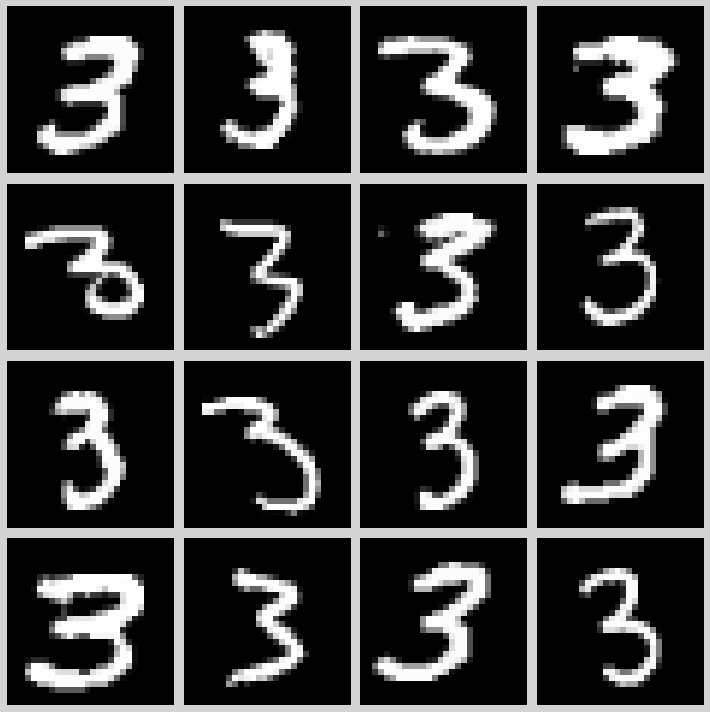

In [10]:
# Plotting the first 16 images of the integer three 
print("First 16 images of the integer 3 in the MNIST-dataset")
plotimgs(train[:,3,:], nplot = 4)

<b> 2b
  

In this project two approaches to creating dictionaries for the chosen digit will be implemented, firstly the SVD method. The first step in this process is to calculate the full SVD for a matrix A, which contains a training dataset of a thousand images of the chosen digit stored columnwise. Since this calculation is a computationally demanding task, it will only be done once throughout task two. Using the results from this calculation, the truncated SVD using d = 16 (number of desired basis vectors) will be calculated to remove redundant vectors, and in turn creating a dictionary. To get a visual impression of the dictionary, the images of the basis vectors will be plotted, and how well these capture the features of the dataset will be evaluated. Lastly the singular values of matrix A will be plotted from highest to lowest value.

In [11]:
def attainData(imgs, n_data): 
    
    '''
       Attains n_test datapoints of an single interger x. 
       --------------------------------------------------
       Input: 
       - imgs = datapoints for class/integer x from file 'train.npy'
       - n_data = number of datapoints 
       
       Output: 
       - A = matrix containing n_test datapoints stored columnwise 
    '''
    
    n = imgs.shape[1]                         # Number of datapoints in each class 
    assert(n > n_data)                        # Cheking there is enough available data in class
    
    m = imgs.shape[0]                         # Number of pixels 
    A = np.zeros((n_data, m))                 # Empty 2d-array to store dataset of size (n_data, m) 
    

    for i in range(n_data):                   # Attaining n_data datapoints from file train.npy 
        A[i] = np.array(imgs[:,i])
        
    A = np.transpose(A)                       # Storing datapoints columnwise 
     
    return A                                  # Returning matrix containing n_data datapoints 


Plot of d = 16 left singular vectors


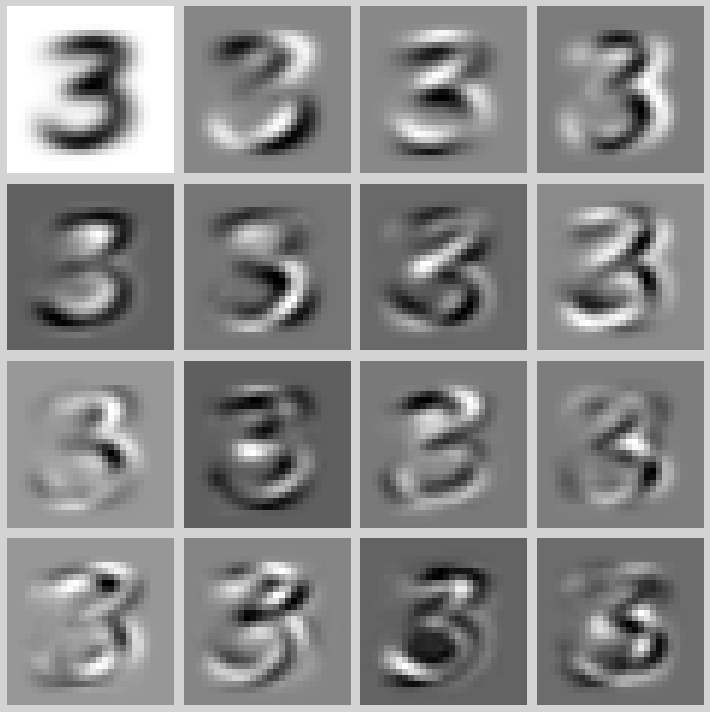

In [12]:
n_train = 1000                                # Size of training dataset
A_train = attainData(train[:,3,:], n_train)   # Matrix with datapoints stored columnwise


U_train,S_train,Vt_train = np.linalg.svd(A_train, full_matrices = False)  # Calculating the full SVD for matrix A_train

W_train, H_train, Sd_train = truncSVD(U_train, S_train, Vt_train, 16)     # Calculating the truncated SVD


print("Plot of d = 16 left singular vectors")                             # Plotting d = 16 left singular vectors 
plotimgs(W_train, nplot = 4)

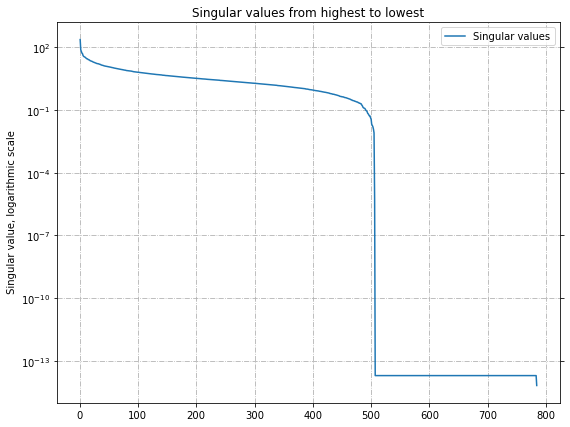

In [13]:
xvals = np.arange(1,785)                                    # x-values for plotting singular values                 

# Plotting the singular values from highest to lowest 
plt.figure(figsize = (9,7))
plt.semilogy(xvals, S_train, label = "Singular values")    # Using logarithmic y-axis 

# Formating plot 
plt.tick_params(top= False, bottom=True, left=True, right=True, labelleft=True, labelbottom=True)
plt.title("Singular values from highest to lowest")
plt.ylabel(" Singular value, logarithmic scale")
plt.grid(ls ="-.")
plt.legend()
plt.show()

Because the basis vectors in W can be seen as eigenvectors of A, they are stored in W from most to least important to reconstruct the original matrix. Since the plot shows the first 16 vectors in W, the images showcase the most important features needed to represent an image of the chosen digit. In general, the individual basis vectors mostly capture the placements of the important curvatures (the very light areas) of the chosen digit. The orientation of the basis vectors is in general upright and not slanted, and by just looking at the four first images it is intuitive that layering these images on top of each other will create a rough representation of the integer three comparable to the images in the original dataset. In this context it is also evident that the level of detail increases as the number of vectors used in the representation increases. It is therefore fair to conclude that the basis vectors capture the most important features of the digit the dictionary is trained on. 

The plot of the singular values to the matrix A, shows the matrix has a little over 500 nonzero singular values, which corresponds to an approximate rank of about 500. As the singular values can be considered as eigenvalues of matrix A, and the basis vectors in W as corresponding eigenvectors, the graph essentially shows the reasoning behind the reduced SVD method. The basis vectors with corresponding zero singular value are linearly dependent, and therefore do not represent new information for the reconstruction, which is why removing them when calculating the reduced SVD doesn’t affect the dictionary’s ability to recreate the original image. 


<b> 2c

By choosing an arbitrary image from the dataset in matrix A and projecting it orthogonally on to the dictionary W = Ud, the dictionary’s qualitative capabilities in recreating the image´s most important features can be evaluated. This is repeated for dictionaries containing varying number of basis vectors, respectively d = 16, 32, 64, 128. The qualitative relationship between the number of basis vectors and the dictionary’s ability to represent an image can be observed by plotting the representation beside the original image. 

To make a machine learning model that can identify images of digits with high accuracy, it is also of interest to consider how well the dictionary can represent digits that it is not trained on. The reasoning behind this is that a dictionary that can represent other digits too well is problematic for classification. Therefore, the same experiment as for the image from the dictionaries training dataset, will be conducted for an image of the digit six. 


In [14]:
def imageProjectionComp(b, d, U, S, Vt, name):
    
    '''
       Calculates the truncated SVD for value of d. Thereafter the projection of the image b on to 
       the obtained basis Ud is calculated. Lastly the projection is  ploted next to the original
       image for comparison. 
       --------------------------------------------------------------------------------------------
       Input: 
       - b = original image from dataset 
       - d = number of singular vectors
       - U = m*n array with basis vectors
       - S = 1d array with singular values
       - Vt = array same first dimension as U
    
    '''
    
    
    W, H, Sd = truncSVD(U, S, Vt, d)   # Calculating truncated SVD for d
    proj = orthproj(W, b)              # Calculating orthogonal projection
    
    
    m = int(np.sqrt(b.shape))          # Reshaping data for plotting 
    b = b.reshape((m,m))
    
    n = int(np.sqrt(proj.shape))       # Reshaping data for plotting 
    proj = proj.reshape((n,n))
    
    

    
    # Making plot to compare original image with projection 
   
    fig, axes = plt.subplots(1,2,figsize=(10, 10))              # Initialize subplots
    #plt.gcf().set_facecolor("lightgray")                       # Set background color
    
    
    axes[0].imshow(b, cmap = "gray")                            # Ploting original image 
    axes[0].set_title(f"Original image {name} ", )
    axes[0].axis('off')
     
    name = name.replace("$", "")
    
    axes[1].imshow(proj, cmap = "gray")                         # Ploting projection 
    axes[1].set_title(f"$P_w({name})$\nd={d}")
    axes[1].axis('off')
    

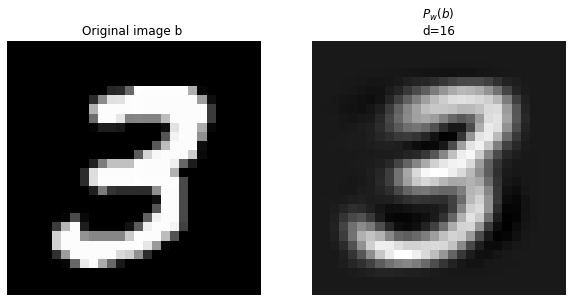

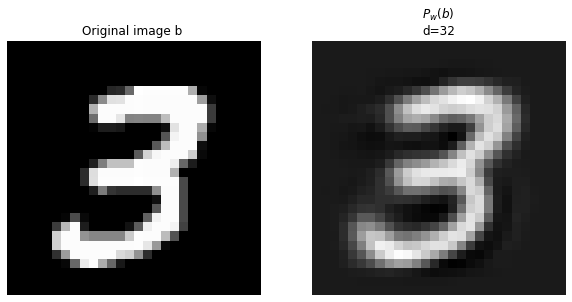

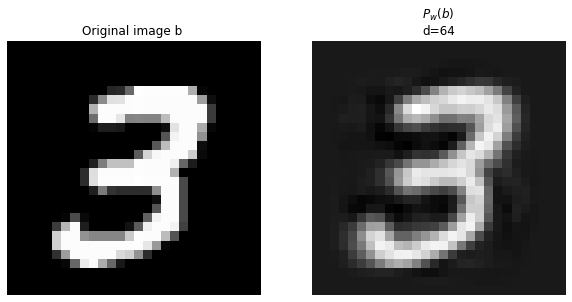

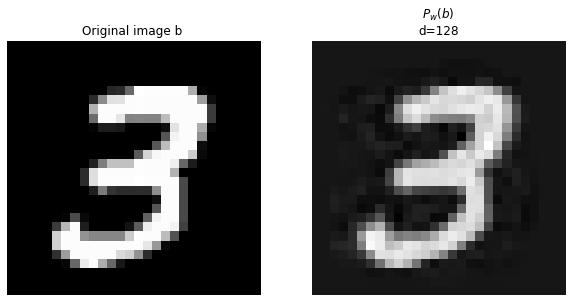

In [15]:
b = A_train[:,0]             # Singel image in desiered dataset (3)

d_vals = [16, 32, 64, 128]   # Array with different values for the number of singular vectors when 
                             # calculating the turncated SVD 


for i in d_vals:                                              # Calulating projection of b and plotting comparison
    imageProjectionComp(b, i, U_train,S_train,Vt_train, "b")  # of projection and original image for different values 
                                                              # of d using function 'imageProjectionComp'

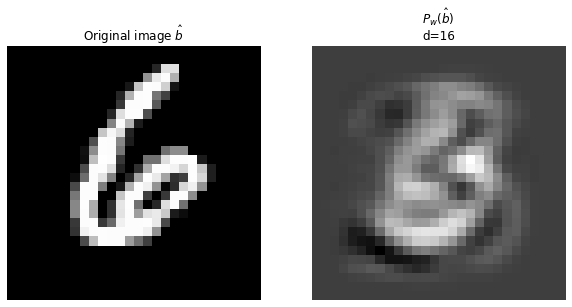

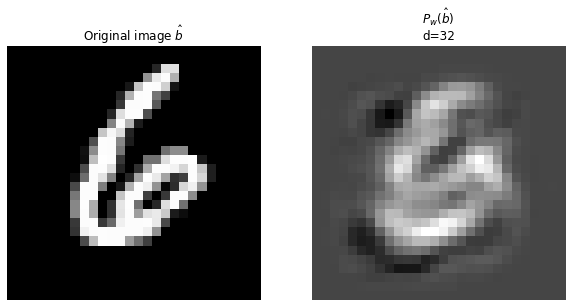

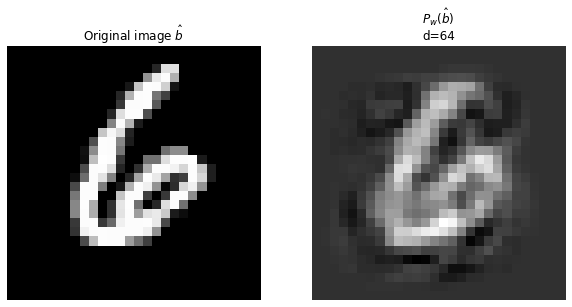

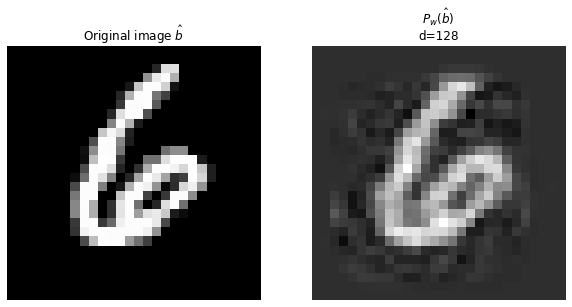

In [16]:
A_th = attainData(train[:,6,:], n_train)    # Attaining matrix with datapoints from different class (6)
b_th = A_th[:,0]                            # Singel Image of the integer six 


for i in d_vals:                                                            # Calulating projection of b_th and plotting comparison
    imageProjectionComp(b_th, i, U_train, S_train, Vt_train, "$\hat{b}$")   # of projection and original image for different values 
                                                                            # of d using function 'imageProjectionComp'
        

In general, the dictionary manages to capture the general shape of the digit, independent of the number of basis vectors. However, one can observe that as the number of basis vectors in the dictionary W increases, the dictionary’s ability to accurately represent the details in the original image also improves. This improvement in representation is most noticeable when it comes to the sharpness of the digits outline. The projections that have been done onto dictionaries with a lower number of basis vectors, are more blurred and have softer edges. This makes sense as there are fewer available basis vectors to utilize in the linear combination, and therefore some details of the image is lost. Common to all the representations is the presence of ghosting (black pixels around the outline of the digit), which does not improve with increasing number of basis vectors. The ghosting occurs because the SVD approach allows negative pixel values. When plotting an image, the darkest pixel (which is black) is set to the lowest pixel value, which will be a negative value  with the SVD approach. This leads to a lighter background because the background has pixel value zero, and because there needs to be space in the value scale for the negative pixel values, zero no longer gets the darkest pixel. 

When using an image that W is not trained on, the plots in general show little to no resemblance to the original image, especially when there are few basis vectors in the dictionary. The representation nevertheless to some extent improves with an increasing number of basis vectors as observed previously. In common for all the representations is that the contrast is lower than in the original image, which indicates that there are negative pixel values. The “digits” themselves resemble more of a blob than an actual digit, although one can make out the original digit from the projection onto the dictionary with 128 basis vectors. This representation is poor and characterized by a lot of ghosting, but catches the general shape. 

<b> 2d

To quantitatively consider what happens when d increases, $\| A - P_W(A)\|^2_F$  for dictionaries with d ∈ [1, 784] will be calculated for both the training dataset in matrix A, and a matrix containing a dataset of the same size with images of the digit six. The grid for the d values utilized have a step size of 16, and the distance $\| A - P_W(A)\|^2_F$ will be plotted as a function of d using a logarithmic y-axis. 

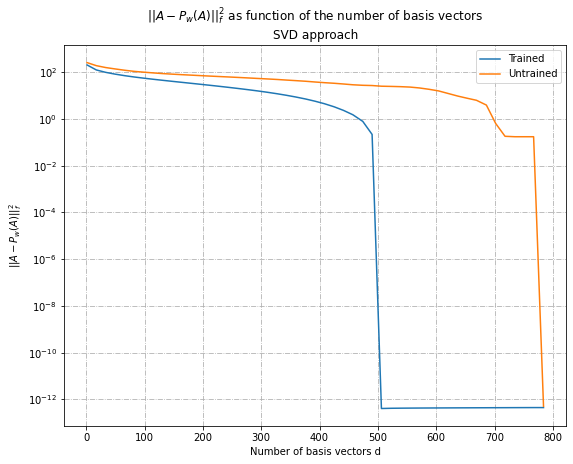

In [17]:
from scipy import linalg as LA 

d_grid = np.linspace(1, 784, 49, dtype = int)   # Array with 49 d values in the range [1, 784] with step 16 


dist_train = np.zeros(len(d_grid))              # Empty arrays to hold calculated distances 
dist_th = np.zeros(len(d_grid))


for i in range(0, len(d_grid)):           
    
    W, H, Sd = truncSVD(U_train, S_train, Vt_train, d_grid[i])    # Calculating truncated SVD
                                  
    # Calculating distance from 
    dist_train[i] = LA.norm(columndist(W, A_train))               # Dataset W is trained on 
    dist_th[i] = LA.norm(columndist(W, A_th))                     # Dataset W is not trained on 

    
# Plotting distance as function of d 
plt.figure(figsize = (9,7))
plt.semilogy(d_grid, dist_train, label = "Trained")        # Trained 
plt.semilogy(d_grid, dist_th, label = "Untrained")         # Untrained 

# Formating plot 
plt.title(f"$|| A - P_w(A) ||^2_f$ as function of the number of basis vectors\nSVD approach")
plt.xlabel("Number of basis vectors d")
plt.ylabel("$|| A - P_w(A) ||^2_f$")
plt.grid(ls = "-.")
plt.legend()
plt.show()

The graph above shows that as the number of basis vectors in the dictionary increases, the distance from matrix A and its projection onto the linear space spanned by the dictionary decreases. This distance eventually reaches zero when the number of basis vectors becomes sufficiently large. Zero distance between the original matrix and its projection indicates that the dictionary can perfectly recreate the original matrix, and in this case a little over 500 basis vectors are needed for this level of accuracy. Since the basis vectors are stored from most to least important for image representation, this implies that the rest of the basis vectors carry redundant information or at least not any new useful information. This graph resembles the graph in 2b) of the singular value to the matrix A.

One can observe that the distance between the original image of the digit six and its projection in the linear space spanned by W is consistently larger than for the image of the digit the dictionary is trained on. The difference in distance for the two images increases as the number of basis vectors increase. This implies that each basis vector doesn’t contribute as much information in the representation of the digit six´s image. A consequence of this is that the number of vectors that carry information important to recreate the original image is larger, and therefore the distance is larger for a bigger amount of basis vectors. This relationship is the most important observation in this context, as this property is crucial for classification. The algorithm used to classify digits later, scores the image based on the distance to its projection on to the respective dictionaries for digits in the range [0,9]. It then classifies the image as the digit with the shortest distance to the corresponding dictionary. The dictionaries’ poor ability to represent digits that it is not trained on is therefore favourable.

<b> 2e

Previously in this task the dictionaries have been created using the SVD approach, but there are multiple possible algorithms to construct dictionaries. In this part of task two the ENMF approach described in 1d) will be implemented for d = 32. To qualitatively compare the SVD and the ENMF approach, their ability to represent images in the training dataset will be considered by plotting a selection of the projections of the images in matrix A on to both dictionaries.

In [18]:
def Wnn(A, d): 
    
    '''
       Attains the non negative matrix W+ containing a basis, where the basis vector 
       are randomly selected columns of the matrix A 
       ------------------------------------------------------------------------------
       Input: 
       A = matrix containing n_test datapoints stored columnwise 
       d = number of basis vectors
       
       Output: 
       Wnn = matrix with d basis vectors selected at random from matrix A 
    '''
    
    randomIndex = np.random.choice(A.shape[1], d, replace=False)    # Replace = False to ensure that no index is selected 
                                                                    # multiple times 
          
    Wnn = np.zeros((len(randomIndex), A.shape[0]))          
    
    for i in range(len(randomIndex)):                               # Storing the random columns of A in Wnn
         Wnn[i] = np.array(A[:,i])
     
    Wnn = np.transpose(Wnn)                                         # Transposing to store columnwise 
     
    return Wnn   

ENMF approach:


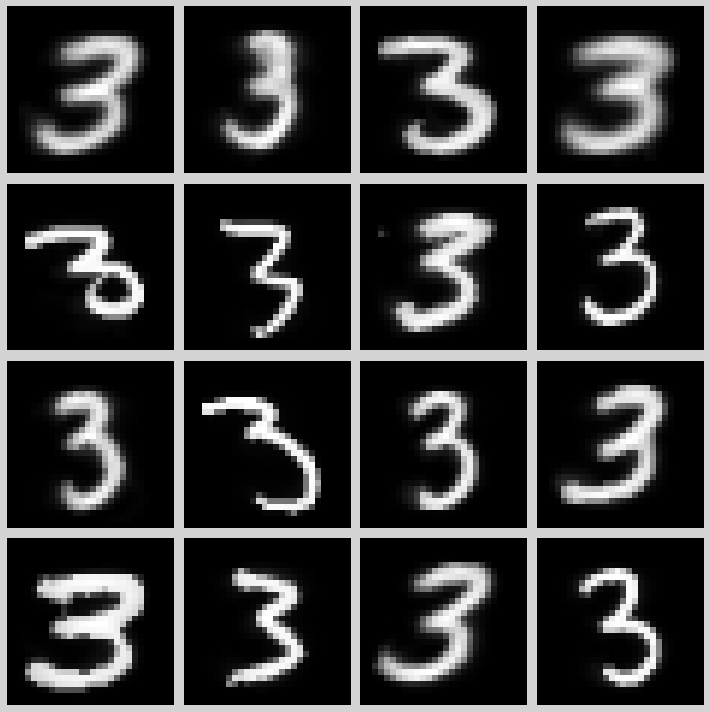

SVD approach:


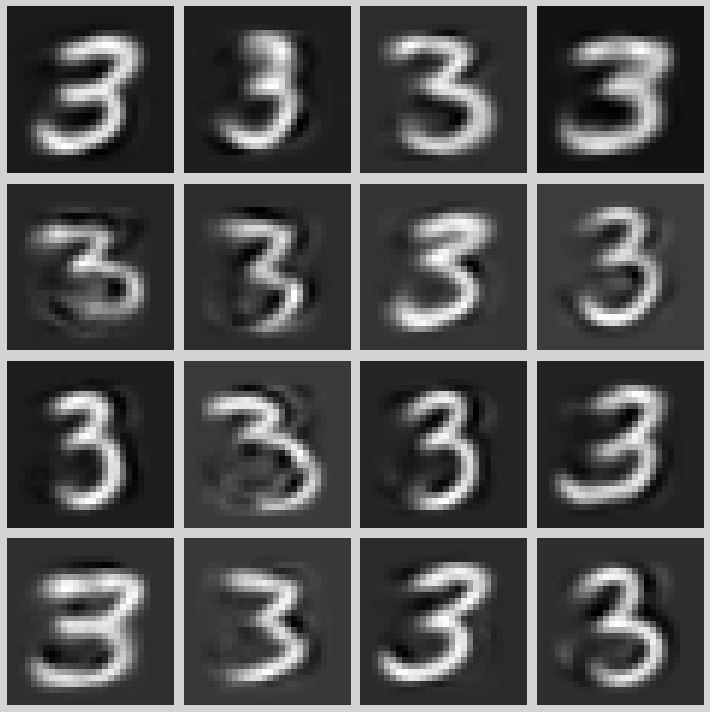

In [19]:
Wnn_32 = Wnn(A_train, 1000)   # W+ basis with 32 basis vectors 


maxiter = 50                  # Maximum number of iterations 
delta = 10**-10               # Safe-division factor


NonNegProj = nnproj(Wnn_32, A_train, maxiter, delta)          # Calculating non-negative projection of A on to linear space 
                                                              # spaned by W+


# Checking that the projection is not equal to original dataset to verfiy projection 
assert(np.array_equal(NonNegProj, A_train) == False) 


W_32, H_32, Sd_32 = truncSVD(U_train, S_train, Vt_train, 32)  # Calculating truncated SVD for d = 32 
SVDproj = orthproj(W_32, A_train)                             # Calculating orthogonal projection onto W 



# Plotting 16 first projections of A_train on to the linear space spaned by 32 basis vectors  

print("ENMF approach:")             # Basis derived with ENMF approach 
plotimgs(NonNegProj, nplot = 4)


print("SVD approach:")              # Basis derived with SVD approach 
plotimgs(SVDproj, nplot = 4)


The first of the two plots above show the non-negative projections onto the dictionary constructed using the ENMF approach. This plot shows an image representation which is considerably closer to the original images than the representation made with the dictionary trained using the SVD approach. For the ENMF approach the images' contrast is better preserved and the background is not characterized by ghosting. When it comes to the digits themselves, the projection captures the general shape well, and the outlines have little blurriness. Since the ENMF approach assumes that the images are non-negative, the darkest pixels in the images will always have value zero, which corresponds to the background’s pixel value. 

The ENMF representation was perceived so well that it was initially questioned if the plot shows projections, and not original images, unlike for the projections made onto the dictionary made with the SVD approach, where the representation of the digits in general has blurred lines and a weaker colour contrast. However the general shape of the digits is well captured by the dictionary, but with a lower level of detail compared to the ENMF approach. By comparison it is evident that the non-negative projection onto the ENMF dictionary is superior in visually representing the original images. The reason for this is that the non-negative pixel values of the original images are considered in the ENMF approach. 

<b> 2f

With the SVD approach it was observed that as the number of basis vectors increased, the distance between the projection and the sub-space spanned by the dictionary decreased, and eventually reached approximately zero. In this part of task two this quantitative relationship will be considered for d ∈ [1, 1000] with respect to the ENMF approach. The d grid values that will be utilized have a coarse step size. The results will be plotted using logarithmic y-axis. 

In [20]:
def diffNumDist(num, d_vals):
    
    '''
       Attains dataset of the integer num, and calculates distance from the dataset to projection of dataset 
        in the linear space spanned by W+ for differt number of basis vectors. 
       -----------------------------------------------------------------------------------------------------
       Input:
       - num = interger between 0-9
       - d_vals = array with d values in the range [0, 1000]
       
       Output: 
       - dist = array with distance from dataset to projection of dataset in the linear space spanned by W for 
                varing number of basis vectors d 
       
    '''
    
    dataset = attainData(train[:, num, :], n_train)   # Dataset containing 1000 datapoints of integer num
    dist = np.zeros(len(d_vals))                      # Empty array to hold distances  
    
    for i in range(0 , len(d_vals)): 
        Wplus = Wnn(A_train, d_vals[i])               # Obtaining W+ with d basis vectors 
        
        dist[i] = LA.norm(nncolumndist(Wplus, dataset, maxiter, delta)) # Calculating distance fromm dataset to 
                                                                        # projection in linear space spaned by W+
    
    return dist 


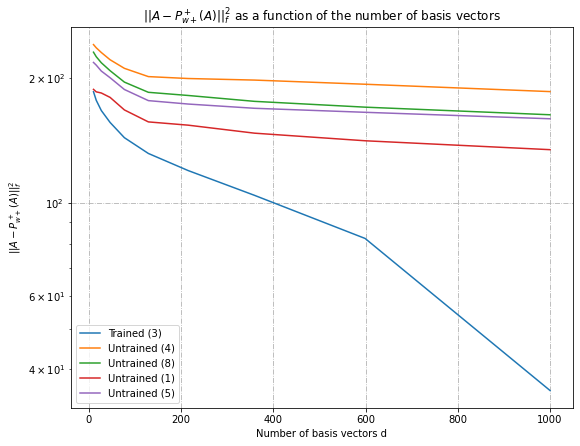

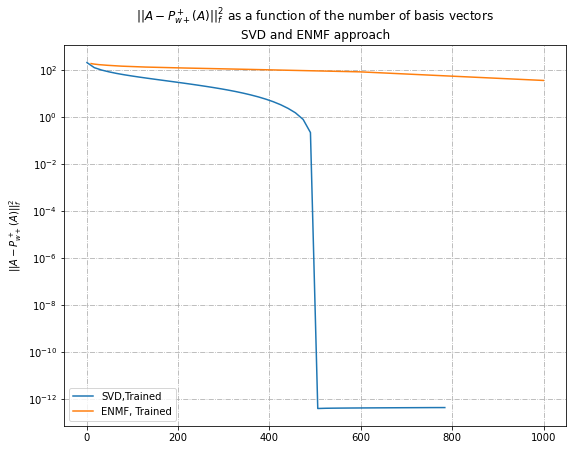

In [21]:
ENMF_d = np.logspace(1,3,10, dtype = np.int64)
nums = [3, 4, 8, 1, 5]                   
distances = np.zeros((6, len(ENMF_d)))  

for i in range(0, len(nums)): 
    distances[i] = diffNumDist(nums[i], ENMF_d)                 # Calulating distance from datasets containing 
                                                                # datapoints for differnt integers to linear 
                                                                # space spanned by W+

# Plotting results 
plt.figure(figsize = (9,7))                                                         
for j in range(0, len(nums)): 
    if j == 0: 
        plt.semilogy(ENMF_d, distances[j], label = "Trained (3)")              # Integer W+ is trained on 
    else: 
        plt.semilogy(ENMF_d, distances[j], label = f"Untrained ({nums[j]})")   # Integers W+ is not trained on 
        
# Formating plot 
plt.xlabel("Number of basis vectors d") 
plt.ylabel("$|| A - P_{w+}^+(A) ||^2_f$")
plt.title("$|| A - P_{w+}^+(A) ||^2_f$ as a function of the number of basis vectors")
plt.grid(ls = "-.")
plt.legend()
plt.show()  


plt.figure(figsize = (9,7))
plt.semilogy(d_grid, dist_train, label = "SVD,Trained") 
plt.semilogy(ENMF_d, distances[0], label = "ENMF, Trained")
plt.legend()
plt.ylabel("$|| A - P_{w+}^+(A) ||^2_f$")
plt.title("$|| A - P_{w+}^+(A) ||^2_f$ as a function of the number of basis vectors\nSVD and ENMF approach")
plt.grid(ls = "-.")
plt.show()

As for the SVD approach, the distance between the image and the projection of the image onto the dictionary decreases as the number of basis vectors increase. However, the distance is consistently much larger both for the image from the training dataset and the image of another digit, compared to the case with the SVD dictionary. The large distance is however most likely due to numerical error of the projection method, as many iterations are needed for it to converge. The most important trait is however that despite the numerical error in the projection method, the distance is always smallest for the digit which the dictionary is trained on. The randomness does not seem to effect our results very much, as we get about the same graph even though we use a new Wnn each time.

## <center>  Task 3

<b> 3a

In part three of this project we will be attempting to classify a set of test data, and then see how well the model performs. The data points will be scored with the distance to the basises, and then classified according to this score. The data point will be classified as the class with the lowest score. It is also relevant to find the most likely member of a class, in this case a one, and compare it to a misclassified one. The effect of the variable d on accuracy will also be tested and discussed in this part of the project.

The code below makes predictions for a set of data with a given set of dictionaries. The function  predict() is for the SVD method, and predictNN() for the ENMF method. The SVD function also finds the most likely image of a one, the one with the smallest distance to the ones basis.


In [22]:
def predict(B, Ws, digits):
    '''
    This function takes in a set of test data, a set of 
    dictionaries for all digits, and a set of which digits are in the test data.
    ----------------------------------
        Input:
        B = matrix with testdata
        Ws = matrix with 10 dictionaries
        digits = list of digits in B
        
        Output:
        p = array with what each datapoint has been classified as
        minID = index for the datapoint of class one with the smallest distance to the basis
    '''
    
    # Make empty list for distances, lists are use in stead of arrays as there were issues writing to the array correctly
    D = []

    # Write the columnwise distances to the list
    for i in range(len(Ws)):
        D.append(columndist(Ws[i],B))

    # Convert list to array so further actions are faster
    Da = np.array(D)

    # Find which basis each test datapoint is closest to
    p = np.argmin(Da, axis = 0)

    # The next block of code finds all datapoints classified as ones, then returns the index of the datapoint with the smallest distance
    ones = []
    for i in range(len(p)):
        if p[i] == 1:
            ones.append(Da[1,i])
        else:
            ones.append([10])
    minDI = np.argmin(ones)
    return p, minDI


maxiter = 50
delta = 10**(-2)

def predictNN(B, WsNN, digits):
    '''
    This function takes in a set of test data, a set of 
    dictionaries for all digits, and a set of which digits are in the test data.
    ----------------------------------
        Input:
        B = matrix with testdata
        WsNN = matrix with 10 non negative dictionaries
        digits = list of digits in B
        
        Output:
        p = array with what each datapoint has been classified as
    '''
    
    # Make empty list for distances, lists are use in stead of arrays as there were issues writing to the array correctly
    D = []
    
    # Write the columnwise distances to the list
    for i in range(len(WsNN)):
        D.append(nncolumndist(WsNN[i],B, maxiter, delta))
    
    # Find which basis each test datapoint is closest to
    p = np.argmin(D, axis = 0)
    
    return p

<b> 3b

The accuracy of classification is as simple as finding how many digits were classified correctly, divided by the total number of digits. The recall of each digit, and which digits were misclassified are also of interest. The code below the given code defines a function which returns the accuracy and recall for a given set of predictions and labels. After that two sets of basis vectors are created, and both models are tested for accuracy and recall with three digits, for d = 32, and d = 16.

In [23]:
def generate_test(test, digits = [0,1,2], N = 800):
    """
    Randomly generates test set.
    input:
        test: numpy array. Should be the test data loaded from file
        digits: python list. Contains desired integers
        N: int. Amount of test data for each class
    output:
        test_sub: (784,len(digits)*N) numpy array. Contains len(digits)*N images
        test_labels: (len(digits)*N) numpy array. Contains labels corresponding to the images of test_sub
    """

    assert N <= test.shape[2] , "N needs to be smaller than or equal to the total amount of available test data for each class"

    assert len(digits)<= 10, "List of digits can only contain up to 10 digits"

    # Arrays to store test set and labels
    test_sub = np.zeros((test.shape[0], len(digits)*N))
    test_labels = np.zeros(len(digits)*N)

    # Iterate over all digit classes and store test data and labels
    for i, digit in enumerate(digits):
        test_sub[:, i*N:(i+1)*N] = test[:,digit,:]
        test_labels[i*N:(i+1)*N] = digit

    # Indexes to be shuffled 
    ids = np.arange(0,len(digits)*N)

    # Shuffle indexes
    np.random.shuffle(ids)

    # Return shuffled data 
    return test_sub[:,ids], test_labels[ids]

In [24]:
def calcAcc (predict, label, digits):
    '''
    This function takes in predictions, labels, and the digits in the testset, and
    returns the total accuracy, and the recall for each digit
    ---------------------------------------------------------------------------
        Input:
        predict = predicted classes for the datapoints
        label = true classes for the datapoints
        digits = list of digits in testset
        
        Output:
        correct/np.size(predict) = total accuracy
        recall/total = recall for each digit
        np.array(wrongIndex) = list of index of all misclassified datapoints
    
    '''
    
    # Initialise all necessary empty lists, arrays, and variables
    recall = np.zeros(len(digits))
    correct = 0
    wrongIndex = []
    total = np.zeros(len(digits))

    # Iterate through all datapoints and check if it's classified correctly
    for i in range(len(predict)):
        if predict[i] == label[i]:
            correct += 1
            recall[np.where(digits == predict[i])] += 1
        else:
            wrongIndex.append(i)
        total[np.where(digits == label[i])] += 1
    return correct/np.size(predict), recall/total, np.array(wrongIndex)


In [26]:
# Create initial values
digits = [1,4,5]
d = 32
d2 = 16
n = 1100

# Generate test dataset
A_test, A_labels = generate_test(test, digits = digits, N = 800)

#Create empty list to store calculations for later use
Alist = []
Ulist = []
Slist = []
Vlist = []

# Create dictionaries to use in classification
dicts = []
dicts16 = []
dictsNN = []
dictsNN16 = []
for i in range(10):
    A = train[:,i,:n]

    U,S,V= np.linalg.svd(A, full_matrices = False)

    #Store results of SVD calculation to avoid calculating them again
    Alist.append(A)
    Ulist.append(U)
    Slist.append(S)
    Vlist.append(V)
    
    L, H, Sd = truncSVD(U,S,V,d)
    L16, H, Sd = truncSVD(U,S,V,d2)
    dicts.append(L)
    dicts16.append(L16)
    dictsNN.append(Wnn(A,d))
    dictsNN16.append(Wnn(A,d2))


# Create predictions for SVD and ENMF methods
predictions, minIndex = predict(A_test, dicts, digits)
predictionsNN = predictNN(A_test, dictsNN, digits)
predictions16, minIndex16 = predict(A_test, dicts16, digits)
predictionsNN16 = predictNN(A_test, dictsNN16, digits)

# Test predictions for SVD and ENMF methods
acc, recall, wrongIndex = calcAcc(predictions, A_labels, digits)
accNN, recallNN, wrongIndexNN = calcAcc(predictionsNN, A_labels, digits)

acc16, recall16, wrongIndex16 = calcAcc(predictions16, A_labels, digits)
accNN16, recallNN16, wrongIndexNN16 = calcAcc(predictionsNN16, A_labels, digits)

# Print accuracy and recall
print('d = 32')
print('Accuracy for the SVD method: ', acc, '\nAccuracy for the ENMF method: ', accNN)
print('SVD Recall for 1,4,5: ', recall, '\nENMF Recall for 1,4,5: ', recallNN)
print('\nd = 16')
print('Accuracy for the SVD method: ', acc16, '\nAccuracy for the ENMF method: ', accNN16)
print('SVD Recall for 1,4,5: ', recall16, '\nENMF Recall for 1,4,5: ', recallNN16)


d = 32
Accuracy for the SVD method:  0.9604166666666667 
Accuracy for the ENMF method:  0.905
SVD Recall for 1,4,5:  [0.99125 0.9575  0.9325 ] 
ENMF Recall for 1,4,5:  [0.98375 0.87875 0.8525 ]

d = 16
Accuracy for the SVD method:  0.96 
Accuracy for the ENMF method:  0.8241666666666667
SVD Recall for 1,4,5:  [0.9925 0.965  0.9225] 
ENMF Recall for 1,4,5:  [0.9825  0.85875 0.63125]


It's clear that the SVD method is significantly better, as shown by the accuracy statistics. One can also note that the accuracy for specific numbers are different. Both the methods have very high accuracy for images of ones, and notably worse accuracy for four, and even worse for five. This can be attributed to the complexity of the numbers, and how differently the numbers can be written. 

The SVD method is better as it's generally better at representing data that fits with the basis vectors. While the ENMF method is a lot faster, it has a payoff of not being as accurate. It is also more dependent on having more basis vectors. This was shown when the test was ran with d = 16. In this case the SVD method was approximately as accurate as with d = 32. However, the ENMF method only had an accuracy of 82% with d = 16. This phenomenon will be explored more thoroughly in exercise 3f), but a short explanation is that as the ENMF method picks basis vectors at random, so it needs more vectors to be able to consistently represent data well. Whereas the SVD method creates and uses the d most important vectors for its basis.


<b> 3c

This code shows the most likely one, as found with the predict() function, and then its projection onto the SVD basis for ones.

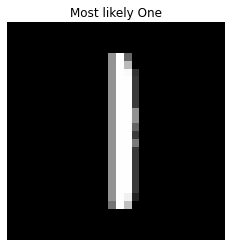

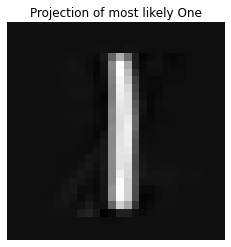

In [27]:
# Plot the one that has the smallest distance to the basis for ones
plt.imshow(A_test[:, minIndex].reshape((28,28)), cmap = 'gray')
plt.title('Most likely One')
plt.axis('off')
plt.show()
proj = orthproj(dicts[1], A_test[:, minIndex])
plt.imshow(proj.reshape((28,28)), cmap = 'gray')
plt.title('Projection of most likely One')
plt.axis('off')
plt.show()

The projection looks very similar to the original image, but with some small artifacts in the background, and a general smoothing of the image.

<b> 3d

This code finds a misclassified one, by going through the list of misclassified digits generated by predict(), and finds the first digit that is a one. This one is then plotted.

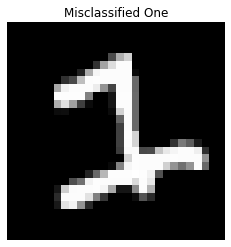

In [28]:
# Index of the first misclassified one
wrongOfClass = wrongIndex[0]
i = 0

# Find a misclassified number of the right class, in this case a one
while A_labels[wrongOfClass] != 1:
    wrongOfClass = wrongIndex[i]
    i+=1
plt.imshow(A_test[:, wrongOfClass].reshape((28,28)), cmap = 'gray')
plt.title('Misclassified One')
plt.axis('off')
plt.show()

There were two main types of misclassified ones. For the first type the main difference is that the one is drawn with an exaggerated horizontal line on the top and bottom. This leads the algorithm to no longer recognise it as a one, as it doesn't fit with the standart vertical line model. The other type is simply too skewed or bent to be recognised as a one.

<b> 3e

he next piece of code classifies a set of data with an extra digit to see if the results noticably change.

In [29]:
# Add 8 to the list of digits
digits_e = [1,4,5,8]
d = 32

# Create new test data
A_test_e, A_labels_e = generate_test(test, digits = digits_e, N = 800)

# As we test with all digits as possibilities there is no need to train the model again
predictions_e, minIndex_e = predict(A_test_e, dicts, digits_e)
acc_e, recall_e, wrongIndex_e = calcAcc(predictions_e, A_labels_e, digits_e)

print(acc_e, recall_e)

0.9521875 [0.99125 0.9575  0.9325  0.9275 ]


One can notice that the total accuracy has gone down a little bit, but that the recall of the digits we had before is consistent. This makes sense as there is no change to the dictionaries, only that new images get categorised. The reason the total accuracy goes down is that the new digit has a recall that's lower than the average accuracy.

<b> 3f

There are many variables that can influence the accuracy of the models, but one significant one is the value of d, or how many basis vectors there are. It's important to choose the correct value for d, and to find the best value one can plot accuracy as a function of d. The code underneath calculates the accuracy of the SVD and ENMF method for different values of d, and then plots them. 

In [30]:
# Create array with values of d
D = np.zeros(11)
for i in range(11):
    D[i] = 2**i

# Define which digits we will test for, and generate test data
digits_f = [1,4,5]
A_test, A_labels_f = generate_test(test, digits = digits_f, N = 800)


# Make empty arrays for accuracies
acc = np.zeros(11)
accNN = np.zeros(11)

# Iterate through values in D
for i in range(11):
    # Create empty list for a set of dictionaries
    dicts_f = []
    dictsNN_f = []
    # Iterate through all digits
    for j in range(10):
        # Use previously calculated SVD results
        A = Alist[j]
        U = Ulist[j]
        S = Slist[j]
        V = Vlist[j]
            
        di = int(D[i])
        
        # Create dictionaries with specific values of d
        L, H, Sd = truncSVD(U,S,V,di)
        dicts_f.append(L)
        dictsNN_f.append(Wnn(A,di))
    
    # Calculate accuracies
    pred, waste = predict(A_test, dicts_f, digits_f)
    predNN = predictNN(A_test, dictsNN_f, digits_f)
    acc[i], waste , waste1 = calcAcc(pred, A_labels_f, digits_f)
    accNN[i], waste, waste1 = calcAcc(predNN, A_labels_f, digits_f)

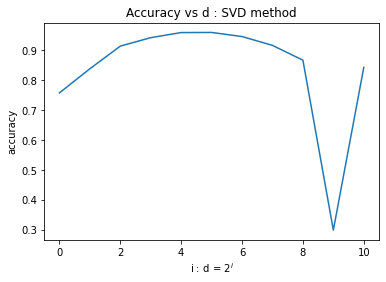

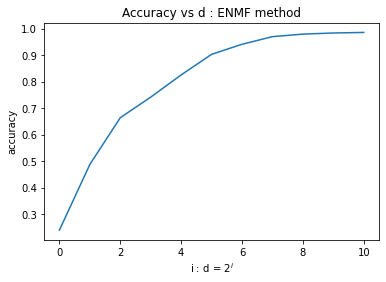

In [31]:
# Plot accuracy vs i, where d = 2^i
I = [0,1,2,3,4,5,6,7,8,9,10]
plt.plot(I,acc)
plt.title('Accuracy vs d : SVD method')
plt.xlabel('i : d = $2^i$')
plt.ylabel('accuracy')
plt.show()
plt.plot(I,accNN)
plt.title('Accuracy vs d : ENMF method')
plt.xlabel('i : d = $2^i$')
plt.ylabel('accuracy')
plt.show()

Here we see that the accuracy for the SVD method rises and peaks as d is between 16 and 32, and then falls off as d increases past that. This makes sense, as with too high values of d, the SVD method will eventually be able to reproduce a much wider range of images than what it is intended for. 

As d rises further past 512, the accuracy rises again. This doesn't seem to make sense, but one possible explanation is that for very high values of d, the distance to all the basises is very close to zero, but that because of numerical approximation errors, the correct basis has a slightly smaller distance.

The ENMF method on the other hand only gets better as d increases. This is because the ENMF method uses randomly selected vectors as its basis, and attempts to represent the data points as a linear combination of the basis vectors. It then makes sense that with more vectors of a certain class, the method becomes better at recognising data points in that class.



<b> Conclusion

First we found a way to represent a matrix as a matrix product, using singular value decomposition, and ENMF method. In order to represent matrices more efficiently they were represented with truncated matrices.  In task two the relationship between how well an image was represented, and how many basis vectors were used was explored, and it was found that more basis vectors led to a more accurate representation, and smaller distances between images and projections. The ENMF method was discovered to be good at visually representing images, due to them being inherently non-negative. In general the ENMF method had larger distances, most likely due to numerical errors in the projection method. Dictionaries constructed using both methods, showed poor ability to represent images which they were not trained.  In task 3 the method was used to classify new data, and tested to see how accurate it was. It was found that certain digits were more accurately classified, and that differing values of d had different effects on the accuracy for each model. As d increased the SVD model improved up to a point, then got substantially worse, then got better as d increased more. In conclusion we managed to classify digits from the MNIST dataset using dictionary learning.  

<b> Sources

•	Ludvigsen, M.(2023). TMA4320 vår 2023 - Industriell Matematikk-Prosjekt : Dictionary learning for classification problems. https://wiki.math.ntnu.no/_media/tma4320/2023v/tma4320_indmat_prosjekt_2023_3_.pdf 

•	Menke, W. (2012). Geophysical Data Analysis: Discrete Inverse Theory(3). s. 127. https://reader.elsevier.com/reader/sd/pii/B9780123877772000100?token=7E541E7491E530C06567DB7648A98E55C4974918680E56547276845959C392C8726E5265408FDE8F0133C72C024639E9&originRegion=eu-west-1&originCreation=20230301103941 

